In [147]:
import os
import pandas as pd
import numpy as np
from glob import glob
import re
from datetime import datetime
import json
import matplotlib.pyplot as plt


# Load Data

In [148]:
df = pd.read_json("../test-data/nv-routes.jsonlines", lines=True)

# Basic Info

In [149]:
df.head(3)

,route_name,grade,safety,type,fa,description,location,protection,metadata
0,Stella by Starlight,"{'YDS': '5.8', 'French': '5b', 'Ewbanks': '16'...",,"{'trad': True, 'aid': True, 'alpine': True}",Wade Mills (solo),"[In the late 1970's, my old friend and mentor,...",[Route ascends the huge main NE face of Wheeler.],"[See route description and ""Hiking and Climbin...","{'left_right_seq': '2', 'parent_lnglat': [-114..."
1,Skin Yamaka,"{'YDS': '5.11a', 'French': '6c', 'Ewbanks': '2...",,{'sport': True},unknown,[Start on a mostly flat gravel platform and cl...,"[Entering the gap from the east, this route wi...",[8 Bolts - Chain Anchor],"{'left_right_seq': '0', 'parent_lnglat': [-114..."
2,Himalayan Snowcock Serenade,"{'YDS': '5.10', 'French': '6b', 'Ewbanks': '20...",,{'trad': True},"Bob Moseley and Hannah North, Summer 1999",[Northeast face of Crooked Finger Tower. Good-...,[See Location of Crooked Finger Tower. Approac...,[Standard rack of nuts and cams to 4.5 inches.],"{'left_right_seq': '0', 'parent_lnglat': [-115..."


In [150]:
df.head(3).T  # Transpose to make columns easier to see

,0,1,2
route_name,Stella by Starlight,Skin Yamaka,Himalayan Snowcock Serenade
grade,"{'YDS': '5.8', 'French': '5b', 'Ewbanks': '16'...","{'YDS': '5.11a', 'French': '6c', 'Ewbanks': '2...","{'YDS': '5.10', 'French': '6b', 'Ewbanks': '20..."
safety,,,
type,"{'trad': True, 'aid': True, 'alpine': True}",{'sport': True},{'trad': True}
fa,Wade Mills (solo),unknown,"Bob Moseley and Hannah North, Summer 1999"
description,"[In the late 1970's, my old friend and mentor,...",[Start on a mostly flat gravel platform and cl...,[Northeast face of Crooked Finger Tower. Good-...
location,[Route ascends the huge main NE face of Wheeler.],"[Entering the gap from the east, this route wi...",[See Location of Crooked Finger Tower. Approac...
protection,"[See route description and ""Hiking and Climbin...",[8 Bolts - Chain Anchor],[Standard rack of nuts and cams to 4.5 inches.]
metadata,"{'left_right_seq': '2', 'parent_lnglat': [-114...","{'left_right_seq': '0', 'parent_lnglat': [-114...","{'left_right_seq': '0', 'parent_lnglat': [-115..."


In [173]:
df.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

,count,nunique,<lambda>
route_name,4962.0,4842.0,0.0
grade,4962.0,NaN,0.0
safety,4962.0,4.0,0.0
type,4962.0,NaN,0.0
fa,4962.0,2193.0,0.0
description,4962.0,NaN,0.0
location,4962.0,NaN,0.0
protection,4962.0,NaN,0.0
metadata,4962.0,NaN,0.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   route_name   4962 non-null   object
 1   grade        4962 non-null   object
 2   safety       4962 non-null   object
 3   type         4962 non-null   object
 4   fa           4962 non-null   object
 5   description  4962 non-null   object
 6   location     4962 non-null   object
 7   protection   4962 non-null   object
 8   metadata     4962 non-null   object
dtypes: object(9)
memory usage: 349.0+ KB


# Basic Info on some columns

## route_name

In [153]:
df.route_name.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

count       4962
nunique     4842
<lambda>       0
Name: route_name, dtype: int64

In [154]:
df.route_name.value_counts()

Unknown                              12
[Redacted]                           12
Unnamed                               6
Dihedral                              4
Center Face                           4
                                     ..
Fire Fresh Traverse                   1
Jones'n                               1
Mantle direct                         1
Rail to seam                          1
French Roast (CLOSED TO CLIMBING)     1
Name: route_name, Length: 4842, dtype: int64

<AxesSubplot:>

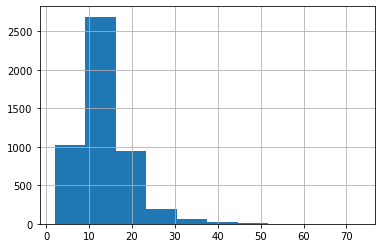

In [155]:
df.route_name.str.len().hist()

### Short values

In [156]:
df[
    df.route_name.str.len()<10
].route_name.value_counts()

Unknown      12
Unnamed       6
Dihedral      4
Left Face     3
Crack         3
             ..
Caliman       1
Bread Box     1
Get Moist     1
West Face     1
Kill Bill     1
Name: route_name, Length: 974, dtype: int64

### Long values

In [157]:
df[
    df.route_name.str.len()>25
].route_name.value_counts()

Himalayan Snowcock Serenade          1
#OwlLivesMatter #Hedwig4President    1
Who Uses a Slingshot Anyway          1
Grand Vizier's Garden Party          1
Chemical Ali Memorial Climb          1
                                    ..
Intercontinental Breakfast           1
West Face - Left Side Lieback        1
West Face - Central Crack Direct     1
South Face - The Downclimb           1
French Roast (CLOSED TO CLIMBING)    1
Name: route_name, Length: 215, dtype: int64

### Alphabetically

In [158]:
df.route_name.sort_values()

4570                             "Route to Nowhere"
187                                "peanut brittle"
3437                                #1s All the Way
3397              #OwlLivesMatter #Hedwig4President
1639                                           $500
                           ...                     
4207                                      unknown 2
259     unknown in gully up & right of Stick climbs
258                    unknown left start to Datura
257                            unknown right of hlt
4206                                        unnamed
Name: route_name, Length: 4962, dtype: object

In [159]:
df.route_name.sort_values().sample(10)

3313         The Owlpine Route
4873    Shelter from the Storm
972                    Cave In
1316      Under the Desert Sky
4369                 Woke Boys
3979             King of Beers
219                     Ixtlan
1642                [Redacted]
4313     Nighttime Shenanigans
4561                Whackamole
Name: route_name, dtype: object

# Expand dict columns

In [160]:
df.dtypes

route_name     object
grade          object
safety         object
type           object
fa             object
description    object
location       object
protection     object
metadata       object
dtype: object

## Grades

In [116]:
dft = pd.DataFrame(df.grade.to_dict().values()).rename(columns=lambda c: 'grades-'+c)
dft

,grades-YDS,grades-French,grades-Ewbanks,grades-UIAA,grades-ZA,grades-British,grades-yds_aid,grades-Font
0,5.8,5b,16,VI-,15,HVS 4c,A3+,NaN
1,5.11a,6c,22,VII+,22,E3 5c,NaN,NaN
2,5.10,6b,20,VII-,19,E2 5b,NaN,NaN
3,5.9-,5c,17,VI,16,HVS 4c,NaN,NaN
4,5.6,4c,14,V,12,S 4b,NaN,NaN
...,...,...,...,...,...,...,...,...
4957,5.12c,7b+,27,IX-,27,E6 6b,NaN,NaN
4958,5.10c,6b,20,VII,20,E2 5b,NaN,NaN
4959,5.10b,6a+,19,VII-,19,E2 5b,NaN,NaN
4960,5.11a,6c,22,VII+,22,E3 5c,NaN,NaN


In [117]:
df = pd.merge(
         df, 
         dft,
         left_index=True,
         right_index=True,
         how='inner'
)

In [118]:
df.drop(columns='grade', inplace=True)

## type

In [119]:
dft = pd.DataFrame(df.type.to_dict().values()).rename(columns=lambda c: 'type-'+c)
dft

,type-trad,type-aid,type-alpine,type-sport,type-tr,type-boulder,type-mixed,type-ice,type-snow
0,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4957,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4958,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4959,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4960,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


In [120]:
dft.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

,count,nunique,<lambda>
type-trad,1823,1,3139
type-aid,26,1,4936
type-alpine,75,1,4887
type-sport,2042,1,2920
type-tr,221,1,4741
type-boulder,1034,1,3928
type-mixed,3,1,4959
type-ice,13,1,4949
type-snow,1,1,4961


In [121]:
dft.mode()

,type-trad,type-aid,type-alpine,type-sport,type-tr,type-boulder,type-mixed,type-ice,type-snow
0,True,True,True,True,True,True,True,True,True


In [122]:
dft.describe()

,type-trad,type-aid,type-alpine,type-sport,type-tr,type-boulder,type-mixed,type-ice,type-snow
count,1823,26,75,2042,221,1034,3,13,1
unique,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True
freq,1823,26,75,2042,221,1034,3,13,1


##### The only unique value in all 'type' columns is 'True'

In [123]:
df = pd.merge(
         df, 
         dft,
         left_index=True,
         right_index=True,
         how='inner'
)

In [124]:
df.drop(columns='type', inplace=True)

## metadata

In [125]:
dft = pd.DataFrame(df.metadata.to_dict().values()).rename(columns=lambda c: 'metadata-'+c)
dft

,metadata-left_right_seq,metadata-parent_lnglat,metadata-parent_sector,metadata-mp_route_id,metadata-mp_sector_id,metadata-mp_path
0,2,"[-114.31392, 38.98578]",Wheeler Peak,109152533,105972685,Eastern Nevada|Wheeler Peak
1,0,"[-114.8918, 39.3509]",Hercules Gap,121646234,106520004,Eastern Nevada|Hercules Gap
2,0,"[-115.09649, 41.01482]",Crooked Finger Tower,121885014,121885007,Eastern Nevada|Crooked Finger Tower
3,0,"[-115.82222, 40.9005]",Cowboy,118130477,118130390,Eastern Nevada|Cowboy
4,0,"[-115.08818, 41.02809]",Trout Slayer Buttress,110636608,110636601,Eastern Nevada|Angel Lake|Trout Slayer Buttress
...,...,...,...,...,...,...
4957,1,"[-114.78819, 36.73445]",Dirty Wall,118321964,108667674,Southern Nevada|Arrow Canyon|Dirty Wall
4958,3,"[-114.76862, 36.72776]",Entry Walls,115411476,106545443,Southern Nevada|Arrow Canyon|Entry Walls
4959,6,"[-114.76862, 36.72776]",Entry Walls,116132291,106545443,Southern Nevada|Arrow Canyon|Entry Walls
4960,1,"[-114.76862, 36.72776]",Entry Walls,106545446,106545443,Southern Nevada|Arrow Canyon|Entry Walls


In [126]:
dft.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

,count,nunique,<lambda>
metadata-left_right_seq,4962.0,51.0,0.0
metadata-parent_lnglat,4962.0,NaN,0.0
metadata-parent_sector,4962.0,881.0,0.0
metadata-mp_route_id,4962.0,4962.0,0.0
metadata-mp_sector_id,4962.0,895.0,0.0
metadata-mp_path,4962.0,895.0,0.0


In [127]:
dft.describe()

,metadata-left_right_seq,metadata-parent_lnglat,metadata-parent_sector,metadata-mp_route_id,metadata-mp_sector_id,metadata-mp_path
count,4962,4962,4962,4962,4962,4962
unique,51,878,881,4962,895,895
top,0,"[-115.47445, 35.97018]",North Face,109152533,107690058,Southern Nevada|Mount Potosi|East Side|Clear L...
freq,809,47,52,1,47,47


In [128]:
df = pd.merge(
         df, 
         dft,
         left_index=True,
         right_index=True,
         how='inner'
)

In [129]:
df.drop(columns='metadata', inplace=True)

# Look at list columns

## description

In [130]:
df.description.str.len().value_counts()

1     3800
2      502
3      192
4      100
5       73
7       61
6       59
0       55
8       33
9       23
10      22
11      13
12      12
13       6
14       6
22       2
26       1
16       1
19       1
Name: description, dtype: int64

In [131]:
df[
    df.description.str.len() > 2
].description.head(2).values

array([list(["Route was TR'd by slinging top of formation.", ' FA party decided that slinging was so easy, it was not worth drilling. ', '  Zip World was named after Zippy the Pinhead.']),
       list(['Start at the overhang just below the first bolt, the crux is below the first of 3 bolts and the climbing gets easier the higher you go. \xa0Use a stick clip or be tall to protect the opening hard moves as a fall from just a few feet off the ground could send you down the hill. \xa0', ' Somebody marked it in chalk as 11a and that felt about right to me. \xa0', ' I tried to toprope this climb before I lead it but all the loose rock at the top made me wish I had just lead it right off the bat.', ' Any extra info on the climb or the crag would be greatly appreciated'])],
      dtype=object)

## Location

In [132]:
df.location.str.len().value_counts()

1    3543
0    1258
2     104
3      32
4       9
5       8
6       6
7       2
Name: location, dtype: int64

In [133]:
df[
    df.location.str.len() > 2
].location.head(2).values

array([list(['Chicken Lips is at the right side of the obvious face in the upper painted bowl. Go up the approach, go to the right side of the wall, scramble up a few yards of 3rd/4th class ramp to a ledge with bolts heading up a blank-looking face.  ', '  The descent is much trickier. You could walk all the way to the main eagle wall descent and come down that. it would require leaving your pack way down in the drainage, and is a great descent but long and potentially wet and fugly if the canyons are running. ', "  the Urioste guide describes a scrambling/rappeling descent that takes you to the high point of the Black Orpheus formation, which is a hop, skip, and a jump from the base of the route. I don't want to quote the Urioste guide. If you are interested in this kind of route, you probably already have it anyway. However, their description was a little unclear to me, most likely my own failing, and i spent a little time trying out different exposed 4th/5th class descent gullies un

## protection

In [134]:
df.protection.str.len().value_counts()

1    4584
0     210
2     152
3       9
4       4
5       2
6       1
Name: protection, dtype: int64

In [135]:
df[
    df.protection.str.len() > 2
].protection.head(2).values

array([list(['Contrary to info in the guidebook and on the Fear and Loathing route page, an appropriate rack for this route is as follows: ', '  1-2x 0.5 Camalots   2-3x 0.75 Camalots   3-4x #1 Camalots   3-4x #2 Camalots   1-2x #3 Camalots ', "  Don't bring wires or any cams smaller than a 0.5 Camalot - you won't find places for them. A 70m rope makes getting down fairly easy; a 60m rope might work with some rope tricks... watch your ends."]),
       list(["Guidebooks generally recommend a full set of cams through #4 Camalot, a set of wires including RP's, and draws.  I recommend: ", "  1 ea. Purple TCU's or equivalent   2 ea. Blue TCU's or equivalent   2 ea. Yellow TCU's or equivalent   2 ea. 0.5 Camalots   1 ea. 0.75 through #2 Camalots   1 set Wires   A dozen slings or draws ", '  A single 60m rope is sufficient for getting up and getting down, but a 70 is nicer.'])],
      dtype=object)

##### Do nothing with list columns

# FA column

In [136]:
df.fa.head(4)

0                            Wade Mills (solo)
1                                      unknown
2    Bob Moseley and Hannah North, Summer 1999
3                   Unknown on an Unknown date
Name: fa, dtype: object

In [137]:
df.fa.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

count       4962
nunique     2193
<lambda>       0
Name: fa, dtype: int64

In [138]:
df.fa.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

count       4962
nunique     2193
<lambda>       0
Name: fa, dtype: int64

# Feature Extraction

## Extract Year

In [139]:
df['year'] = df['fa'].str.extract(r"(\d+)\s*$", expand=False)
df[['fa', 'year']]

,fa,year
0,Wade Mills (solo),NaN
1,unknown,NaN
2,"Bob Moseley and Hannah North, Summer 1999",1999
3,Unknown on an Unknown date,NaN
4,"Dustin Hoover, Jim Mercer. Free solo. June 11...",2015
...,...,...
4957,unknown,NaN
4958,unknown,NaN
4959,Jeff Baldwin,NaN
4960,unknown,NaN


In [140]:
df['year'] = df['year'].fillna('')

In [141]:
df['fa_text'] = df.apply(lambda x: 
                     x['fa'][::-1].replace(x['year'][::-1], "", 1)[::-1], 
                 axis=1) \
                .str.strip(", '")

df[['fa', 'fa_text']]

,fa,fa_text
0,Wade Mills (solo),Wade Mills (solo)
1,unknown,unknown
2,"Bob Moseley and Hannah North, Summer 1999","Bob Moseley and Hannah North, Summer"
3,Unknown on an Unknown date,Unknown on an Unknown date
4,"Dustin Hoover, Jim Mercer. Free solo. June 11...","Dustin Hoover, Jim Mercer. Free solo. June 11"
...,...,...
4957,unknown,unknown
4958,unknown,unknown
4959,Jeff Baldwin,Jeff Baldwin
4960,unknown,unknown


## Split Climbers

In [142]:
df = df.reset_index().rename(columns={'index': 'ID'})

In [143]:
!mkdir -p data/

In [144]:
df['fa_text'] \
    .str.split(" and |&|,") \
    .explode() \
    .str.strip() \
    .to_csv("data/tmp-nv-routes-climbers-expanded.csv", index=True)

##### Look at the save data to take decisions on improving the extraction

# TODO from here

In [145]:
df['fa_text'] \
    .str.split(" and |&|,") \
    .explode() \
    .str.strip() \
    .reset_index().rename(columns={'index': 'ID'}) \
    .groupby('ID')['fa_text'] \
    .apply(lambda x: ';'.join(x.astype(str)))

ID
0                                   Wade Mills (solo)
1                                             unknown
2                     Bob Moseley;Hannah North;Summer
3                          Unknown on an Unknown date
4       Dustin Hoover;Jim Mercer.  Free solo. June 11
                            ...                      
4957                                          unknown
4958                                          unknown
4959                                     Jeff Baldwin
4960                                          unknown
4961                                      Gena Howald
Name: fa_text, Length: 4962, dtype: object

In [146]:
# split climbers by all possible separators
# expand them in rows 
# clean them
# join them all back by ";"
df['climbers'] = df['fa_text'] \
    .str.split(" and |&|,") \
    .explode() \
    .str.strip() \
    .groupby(['ID']).apply(lambda x: ';'.join(x.astype(str)))

KeyError: 'ID'

In [ ]:
df['climbers']

In [ ]:
df

,fa,year,fa_text,climbers
ID,,,,
1,"Eric Wright and Frank Robertson, 2008",2008,Eric Wright and Frank Robertson,Eric Wright;Frank Robertson
2,"John Long, Lynn Hill & Joanne Urioste '83",83,"John Long, Lynn Hill & Joanne Urioste",John Long;Lynn Hill;Joanne Urioste
3,"L. Hill, 1993",1993,L. Hill,L. Hill


## Normalize climber names

Prepare a manual decision dict to rename climbers names as much as possible

In [ ]:
df['climbers'].str.split(";", expand=False)\
    .explode() \
    .sort_values()

ID
1        Eric Wright
1    Frank Robertson
2     Joanne Urioste
2          John Long
3            L. Hill
2          Lynn Hill
Name: climbers, dtype: object

In [ ]:
renamings = {k: k for k in 
                df['climbers'].str.split(";", expand=False)\
                .explode() \
                .sort_values().unique()}
renamings

{'Eric Wright': 'Eric Wright',
 'Frank Robertson': 'Frank Robertson',
 'Joanne Urioste': 'Joanne Urioste',
 'John Long': 'John Long',
 'L. Hill': 'L. Hill',
 'Lynn Hill': 'Lynn Hill'}

Copy and paste above and manual edit as desired.
This is probably most suitable step to take in Prophecies application if it becomes pretty big task.

In [ ]:
my_manual_renamings = {
    #'Eric Wright': 'Eric Wright',
    #'Frank Robertson': 'Frank Robertson',
    #'Joanne Urioste': 'Joanne Urioste',
    #'John Long': 'John Long',
    'L. Hill': 'Lynn Hill',
    #'Lynn Hill': 'Lynn Hill'
}

In [ ]:
def run_all_renamings(x):
    for k, v in my_manual_renamings.items():
        x = x.replace(k, v)
    return x

In [ ]:
df['climbers'] = df['climbers'].map(run_all_renamings)

## Expand Climbers in columns

In [ ]:
dft = df['climbers'].str.split(";", expand=True)
dft.columns = ['climber_' + str(i+1) for i in dft.columns]
df = pd.concat([df, dft], axis=1)

In [ ]:
df

,fa,year,fa_text,climbers,climber_1,climber_2,climber_3
ID,,,,,,,
1,"Eric Wright and Frank Robertson, 2008",2008,Eric Wright and Frank Robertson,Eric Wright;Frank Robertson,Eric Wright,Frank Robertson,None
2,"John Long, Lynn Hill & Joanne Urioste '83",83,"John Long, Lynn Hill & Joanne Urioste",John Long;Lynn Hill;Joanne Urioste,John Long,Lynn Hill,Joanne Urioste
3,"L. Hill, 1993",1993,L. Hill,Lynn Hill,Lynn Hill,None,None


# Normalize year

In [ ]:
def normalize_year(y):
    y = int(y)
    if y < 22:
        # it is only 2 digits and passed 2000s
        y += 2000
    elif y < 100:
        # it is only 2 digits and before 2000s
        y += 1900
    return y

In [ ]:
df.insert(
    df.columns.tolist().index('year')+1,
    'year_normalized',
    df['year'].map(normalize_year)
)

In [ ]:
df

,fa,year,year_normalized,fa_text,climbers,climber_1,climber_2,climber_3
ID,,,,,,,,
1,"Eric Wright and Frank Robertson, 2008",2008,2008,Eric Wright and Frank Robertson,Eric Wright;Frank Robertson,Eric Wright,Frank Robertson,None
2,"John Long, Lynn Hill & Joanne Urioste '83",83,1983,"John Long, Lynn Hill & Joanne Urioste",John Long;Lynn Hill;Joanne Urioste,John Long,Lynn Hill,Joanne Urioste
3,"L. Hill, 1993",1993,1993,L. Hill,Lynn Hill,Lynn Hill,None,None
